## Imports

In [1]:
import numpy as np, pandas as pd
import pickle
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("ticks")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%load_ext autoreload
%autoreload 2
from scripts import farseeing, fallalld, sisfall, classifiers, utils

### Load and visualize datasets

In [2]:
farseeing_df = farseeing.load()
fallalld_df = fallalld.load()
sisfall_df = sisfall.load()

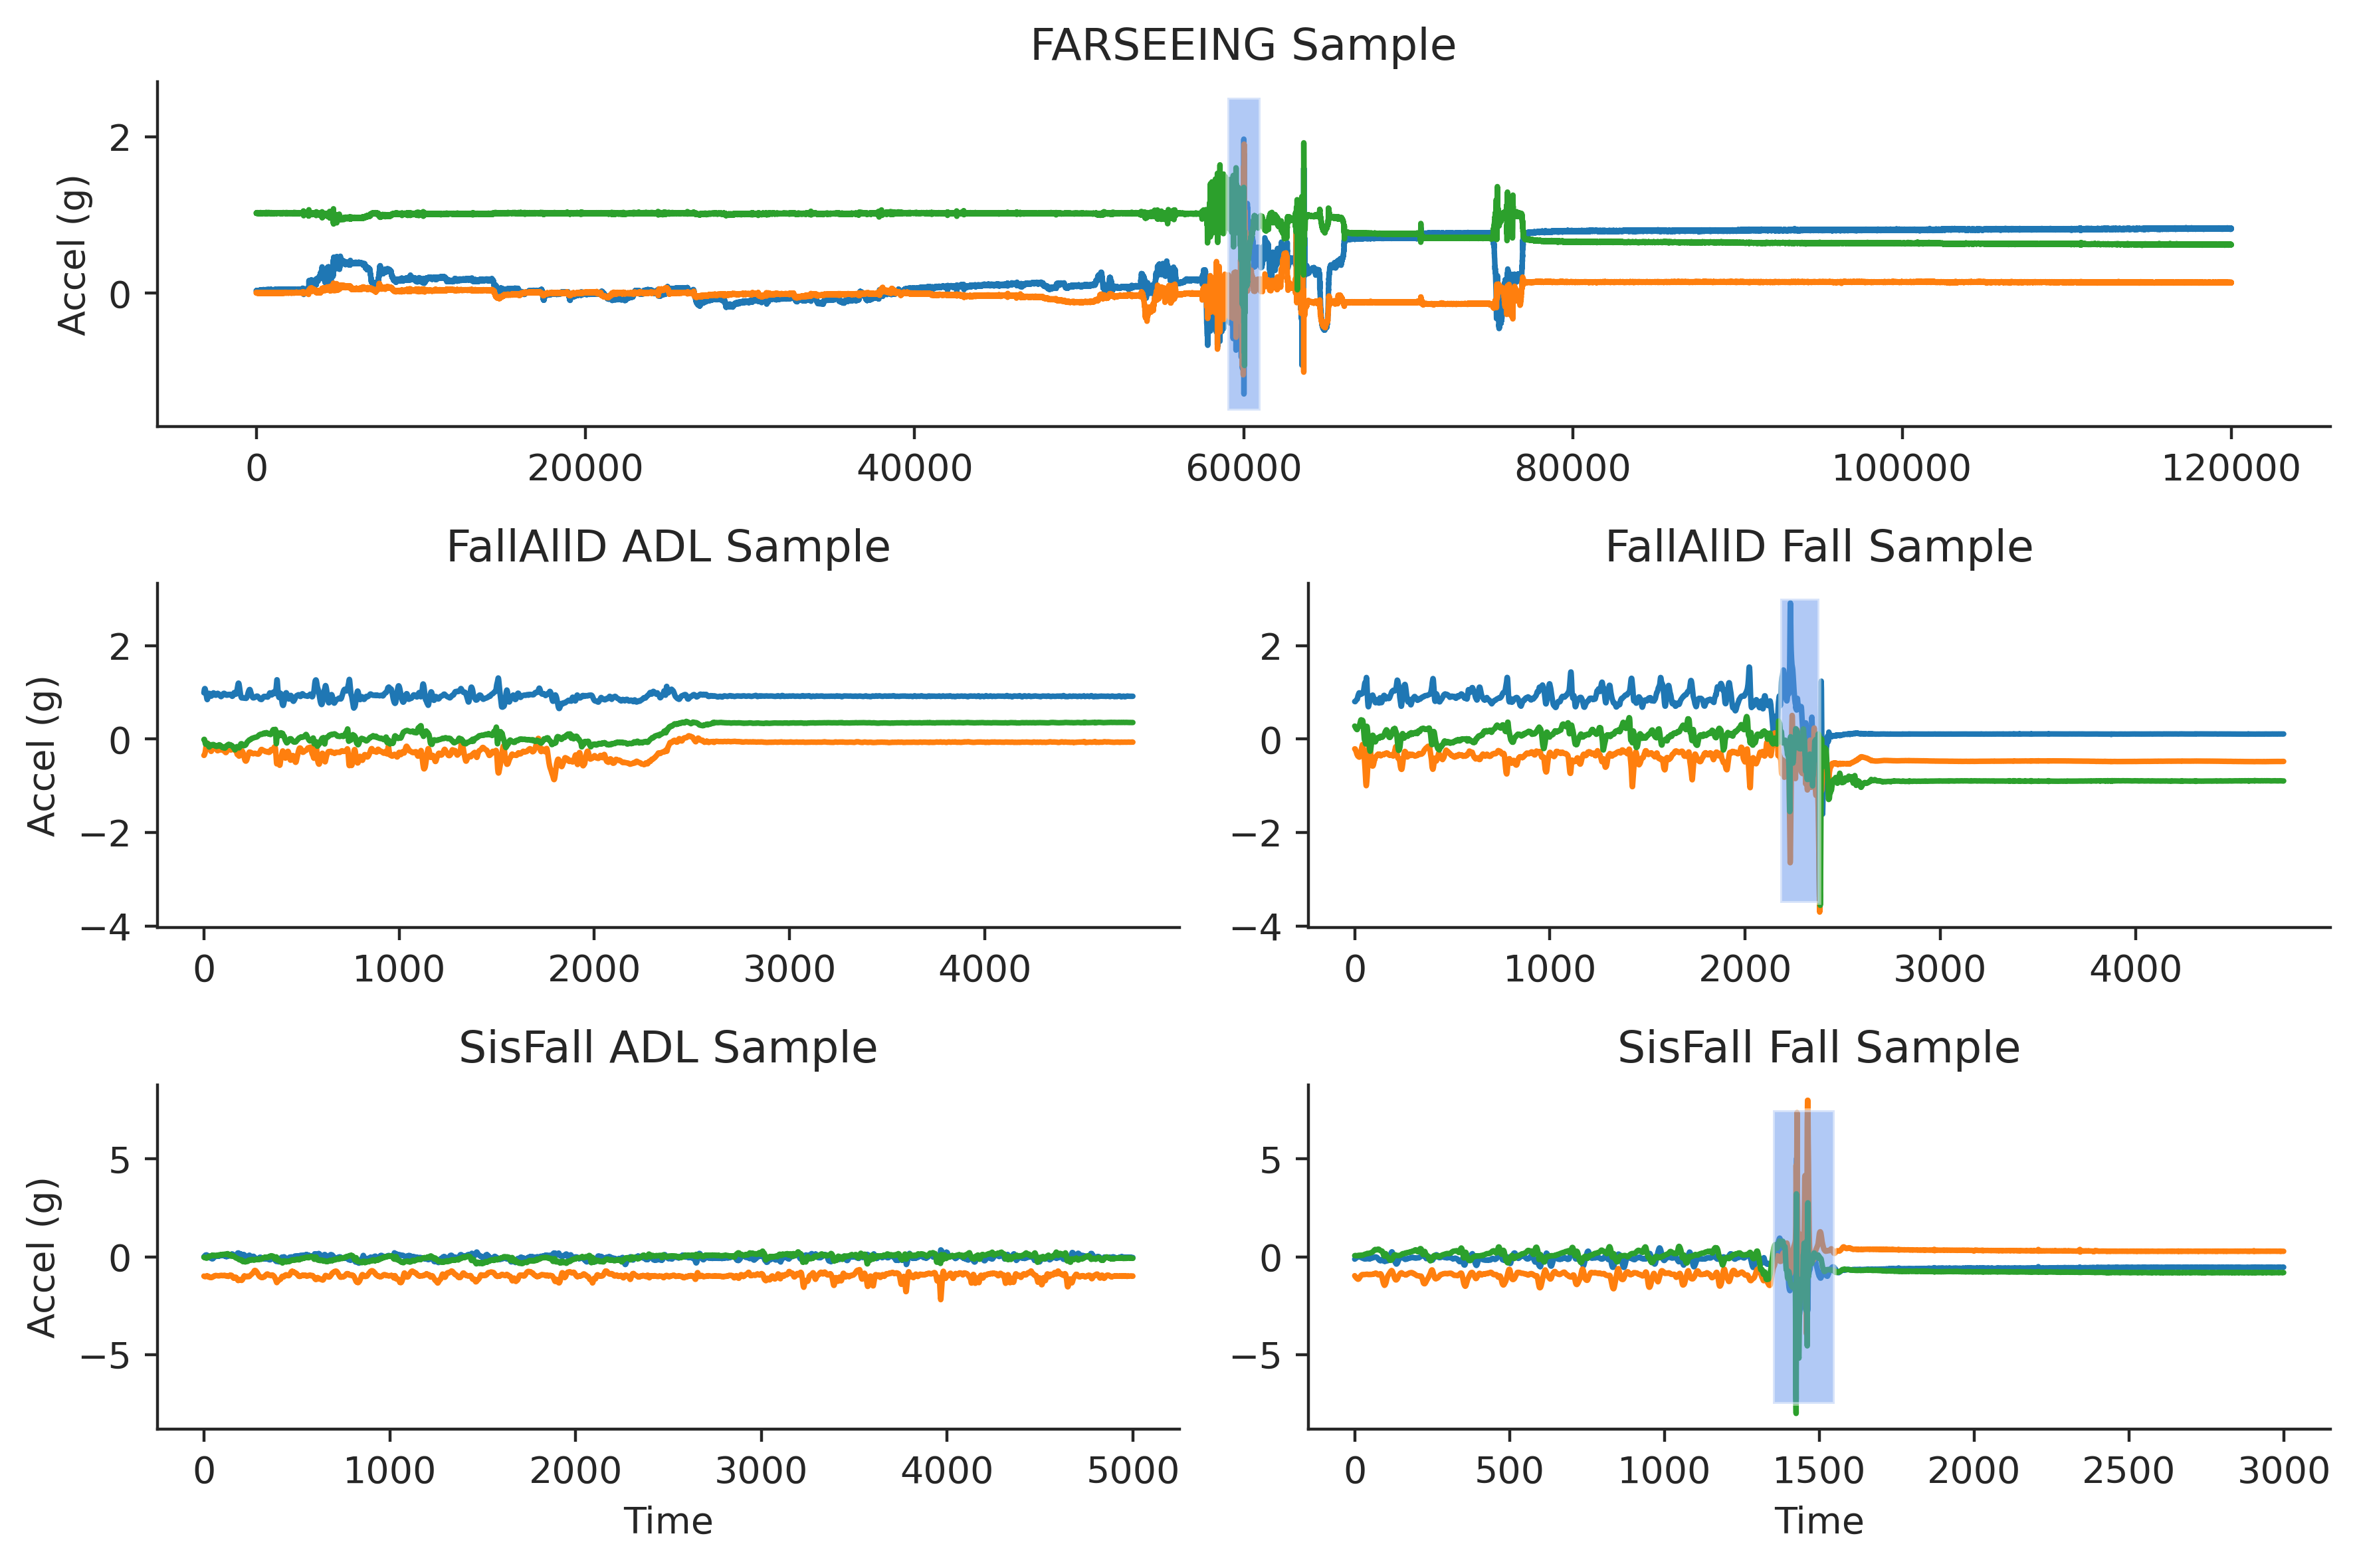

In [3]:
fig = plt.figure(figsize=(9,6), dpi=400)
ax1 = fig.add_subplot(3,2, (1,2))
farseeing.plot_sample(farseeing_df, ax1)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
fallalld.plot_sample(fallalld_df, [ax2, ax3])
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)
sisfall.plot_sample(sisfall_df, [ax4,ax5])
fig.tight_layout()
sns.despine()
plt.show()

## Baselines with Tabular Models

### FARSEEING Dataset

In [54]:
farseeing_cv_df, farseeing_aggr = classifiers.cross_validate(
  farseeing, df=farseeing_df, model_type='tabular')



-- fold 1 (8 subjects) --
Train set: X: (983, 700), y: (983,)            ([ADLs, Falls]) [865 118]
Test set: X: (331, 700), y: (331,)            ([ADLs, Falls]) [304  27]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 2 (8 subjects) --
Train set: X: (803, 700), y: (803,)            ([ADLs, Falls]) [684 119]
Test set: X: (511, 700), y: (511,)            ([ADLs, Falls]) [485  26]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 3 (8 subjects) --
Train set: X: (1219, 700), y: (1219,)            ([ADLs, Falls]) [1094  125]
Test set: X: (95, 700), y: (95,)            ([ADLs, Falls]) [75 20]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 4 (8 subjects) --
Train set: X: (1166, 700), y: (1166,)            ([ADLs, Falls]) [1039  127]
Test set: X: (148, 700), y: (148,)            ([ADLs, Falls]) [130  18]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 5 (8 subjects) --
Train set: X: (1086, 700), y

In [59]:
farseeing_cv_df.to_csv('results/farseeing_cv_df_tabular.csv')

### FallAllD Dataset

In [55]:
fallalld_cv_df, fallalld_aggr = classifiers.cross_validate(
  fallalld, df=fallalld_df, model_type='tabular')



-- fold 1 (2 subjects) --
Train set: X: (1455, 1666), y: (1455,)            ([ADLs, Falls]) [1082  373]
Test set: X: (290, 1666), y: (290,)            ([ADLs, Falls]) [197  93]
LogisticCV.

.. RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 2 (2 subjects) --
Train set: X: (1465, 1666), y: (1465,)            ([ADLs, Falls]) [1077  388]
Test set: X: (280, 1666), y: (280,)            ([ADLs, Falls]) [202  78]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 3 (2 subjects) --
Train set: X: (1461, 1666), y: (1461,)            ([ADLs, Falls]) [1058  403]
Test set: X: (284, 1666), y: (284,)            ([ADLs, Falls]) [221  63]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 4 (2 subjects) --
Train set: X: (1489, 1666), y: (1489,)            ([ADLs, Falls]) [1090  399]
Test set: X: (256, 1666), y: (256,)            ([ADLs, Falls]) [189  67]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 5 (2 subjects) --
Train set: X: (1622, 1666), y: (1622,)            ([ADLs, Falls]) [1199  423]
Test set: X: (123, 1666), y: (123,)            ([ADLs, Falls]) [80 43]
LogisticCV... RandomForest... KNN... RidgeCV... E

In [61]:
fallalld_cv_df.to_csv('results/fallalld_cv_df_tabular.csv')

### SisFall Dataset

In [56]:
sisfall_cv_df, sisfall_aggr = classifiers.cross_validate(
  sisfall, df=sisfall_df, model_type='tabular')



-- fold 1 (7 subjects) --
Train set: X: (9961, 1400), y: (9961,)            ([ADLs, Falls]) [8957 1004]
Test set: X: (2082, 1400), y: (2082,)            ([ADLs, Falls]) [1886  196]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 2 (7 subjects) --
Train set: X: (9730, 1400), y: (9730,)            ([ADLs, Falls]) [8883  847]
Test set: X: (2313, 1400), y: (2313,)            ([ADLs, Falls]) [1960  353]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 3 (7 subjects) --
Train set: X: (9699, 1400), y: (9699,)            ([ADLs, Falls]) [8706  993]
Test set: X: (2344, 1400), y: (2344,)            ([ADLs, Falls]) [2137  207]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 4 (7 subjects) --
Train set: X: (9793, 1400), y: (9793,)            ([ADLs, Falls]) [8720 1073]
Test set: X: (2250, 1400), y: (2250,)            ([ADLs, Falls]) [2123  127]
LogisticCV... RandomForest... KNN... RidgeCV... ExtraTrees... 

-- fold 5 (7 subje

In [63]:
sisfall_cv_df.to_csv('results/sisfall_cv_df_tabular.csv')

In [156]:
farseeing_aggr['Dataset'] = 'FARSEEING'
fallalld_aggr['Dataset'] = 'FallAllD'
sisfall_aggr['Dataset'] = 'SisFall'

In [159]:
all_aggr = pd.concat([farseeing_aggr, fallalld_aggr, sisfall_aggr],
                     ignore_index=True)
all_aggr.to_csv('results/tabular_cv_results.csv')

### Summary Visualization

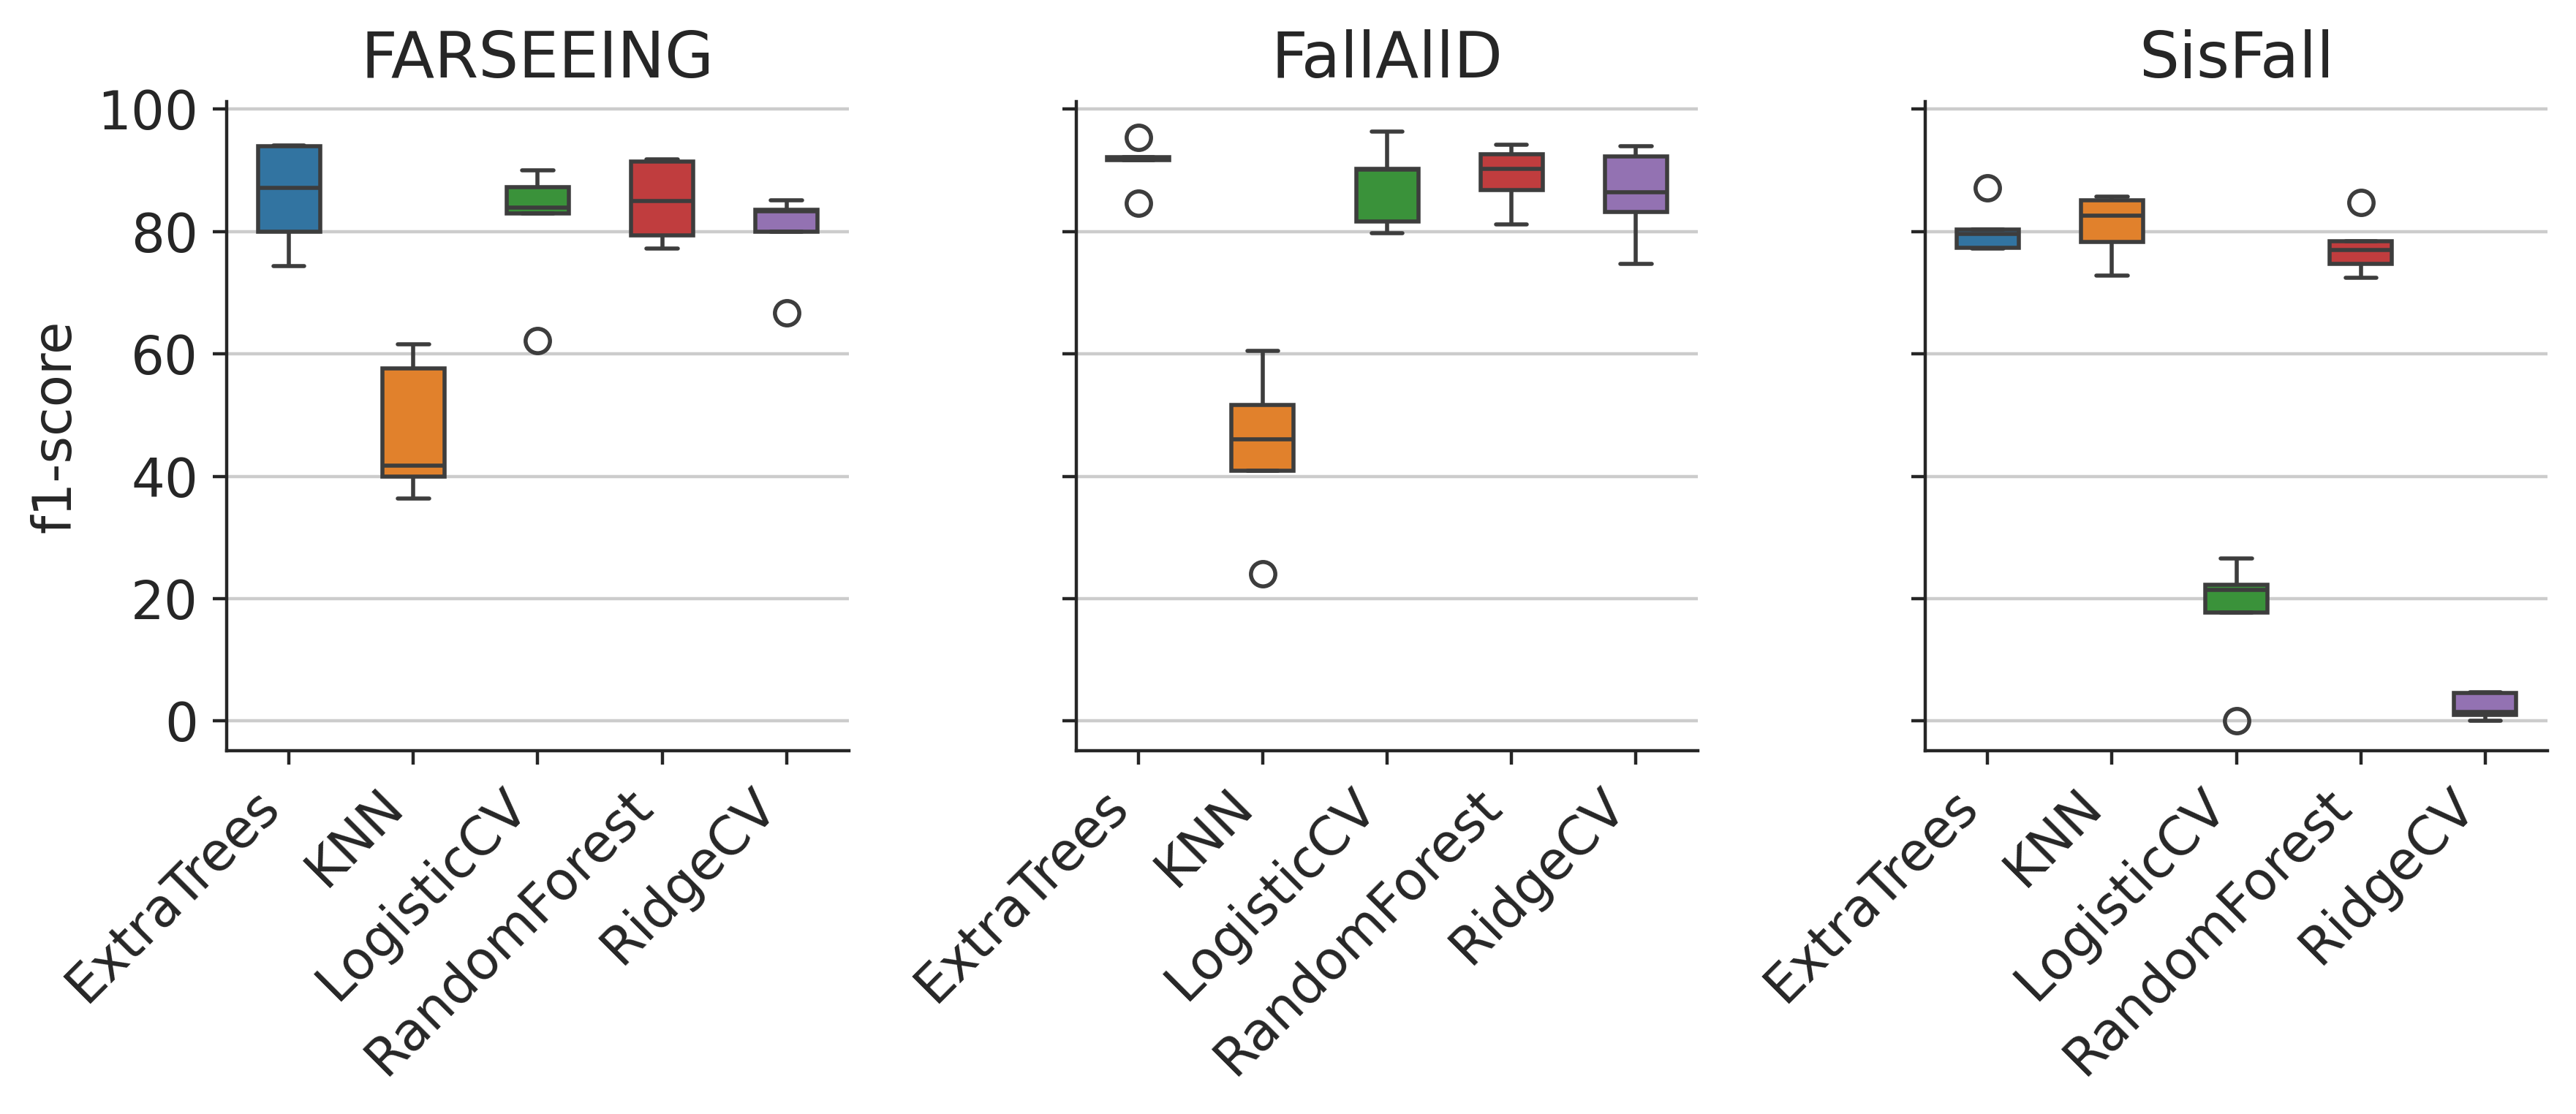

In [64]:
dfs = [farseeing_cv_df, fallalld_cv_df, sisfall_cv_df]
utils.summary_visualization(dfs, model_type='tabular')

## Classification with Time Series Models

### FARSEEING Dataset

In [40]:
farseeing_cv_df_ts, farseeing_aggr_ts = classifiers.cross_validate(
  farseeing, df=farseeing_df, model_type='ts')



-- fold 1 (8 subjects) --
Train set: X: (983, 700), y: (983,)            ([ADLs, Falls]) [865 118]
Test set: X: (331, 700), y: (331,)            ([ADLs, Falls]) [304  27]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 2 (8 subjects) --
Train set: X: (803, 700), y: (803,)            ([ADLs, Falls]) [684 119]
Test set: X: (511, 700), y: (511,)            ([ADLs, Falls]) [485  26]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 3 (8 subjects) --
Train set: X: (1219, 700), y: (1219,)            ([ADLs, Falls]) [1094  125]
Test set: X: (95, 700), y: (95,)            ([ADLs, Falls]) [75 20]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 4 (8 subjects) --
Train set: X: (1166, 700), y: (1166,)            ([ADLs, Falls]) [1039  127]
Test set: X: (148, 700), y: (148,)            ([ADLs, Falls]) [130  18]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 5 (8 subjects) --
Train set: X: (1086, 700), y: (1086,)   

In [66]:
farseeing_cv_df_ts.to_csv('results/farseeing_cv_df_ts.csv')

### FallAllD Dataset

In [42]:
fallalld_cv_df_ts, fallalld_aggr_ts = classifiers.cross_validate(
  fallalld, df=fallalld_df, model_type='ts')



-- fold 1 (2 subjects) --
Train set: X: (1455, 1666), y: (1455,)            ([ADLs, Falls]) [1082  373]
Test set: X: (290, 1666), y: (290,)            ([ADLs, Falls]) [197  93]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 2 (2 subjects) --
Train set: X: (1465, 1666), y: (1465,)            ([ADLs, Falls]) [1077  388]
Test set: X: (280, 1666), y: (280,)            ([ADLs, Falls]) [202  78]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 3 (2 subjects) --
Train set: X: (1461, 1666), y: (1461,)            ([ADLs, Falls]) [1058  403]
Test set: X: (284, 1666), y: (284,)            ([ADLs, Falls]) [221  63]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 4 (2 subjects) --
Train set: X: (1489, 1666), y: (1489,)            ([ADLs, Falls]) [1090  399]
Test set: X: (256, 1666), y: (256,)            ([ADLs, Falls]) [189  67]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 5 (2 subjects) --
Train set: X: (1622,

In [68]:
fallalld_cv_df_ts.to_csv('results/fallalld_cv_df_ts.csv')

### SisFall Dataset

In [47]:
sisfall_cv_df_ts, sisfall_aggr_ts = classifiers.cross_validate(
  sisfall, df=sisfall_df, model_type='ts')



-- fold 1 (7 subjects) --
Train set: X: (9961, 1400), y: (9961,)            ([ADLs, Falls]) [8957 1004]
Test set: X: (2082, 1400), y: (2082,)            ([ADLs, Falls]) [1886  196]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 2 (7 subjects) --
Train set: X: (9730, 1400), y: (9730,)            ([ADLs, Falls]) [8883  847]
Test set: X: (2313, 1400), y: (2313,)            ([ADLs, Falls]) [1960  353]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 3 (7 subjects) --
Train set: X: (9699, 1400), y: (9699,)            ([ADLs, Falls]) [8706  993]
Test set: X: (2344, 1400), y: (2344,)            ([ADLs, Falls]) [2137  207]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 4 (7 subjects) --
Train set: X: (9793, 1400), y: (9793,)            ([ADLs, Falls]) [8720 1073]
Test set: X: (2250, 1400), y: (2250,)            ([ADLs, Falls]) [2123  127]
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

-- fold 5 (7 subjects) --
Trai

In [49]:
sisfall_cv_df_ts.to_csv('results/sisfall_cv_df_ts.csv')

In [160]:
farseeing_aggr_ts['Dataset'] = 'FARSEEING'
fallalld_aggr_ts['Dataset'] = 'FallAllD'
sisfall_aggr_ts['Dataset'] = 'SisFall'

In [161]:
all_aggr_ts = pd.concat([farseeing_aggr_ts, fallalld_aggr_ts, sisfall_aggr_ts],
                     ignore_index=True)
all_aggr_ts.to_csv('results/ts_cv_results.csv')

## Summary for TS and Tabular on all Datasets

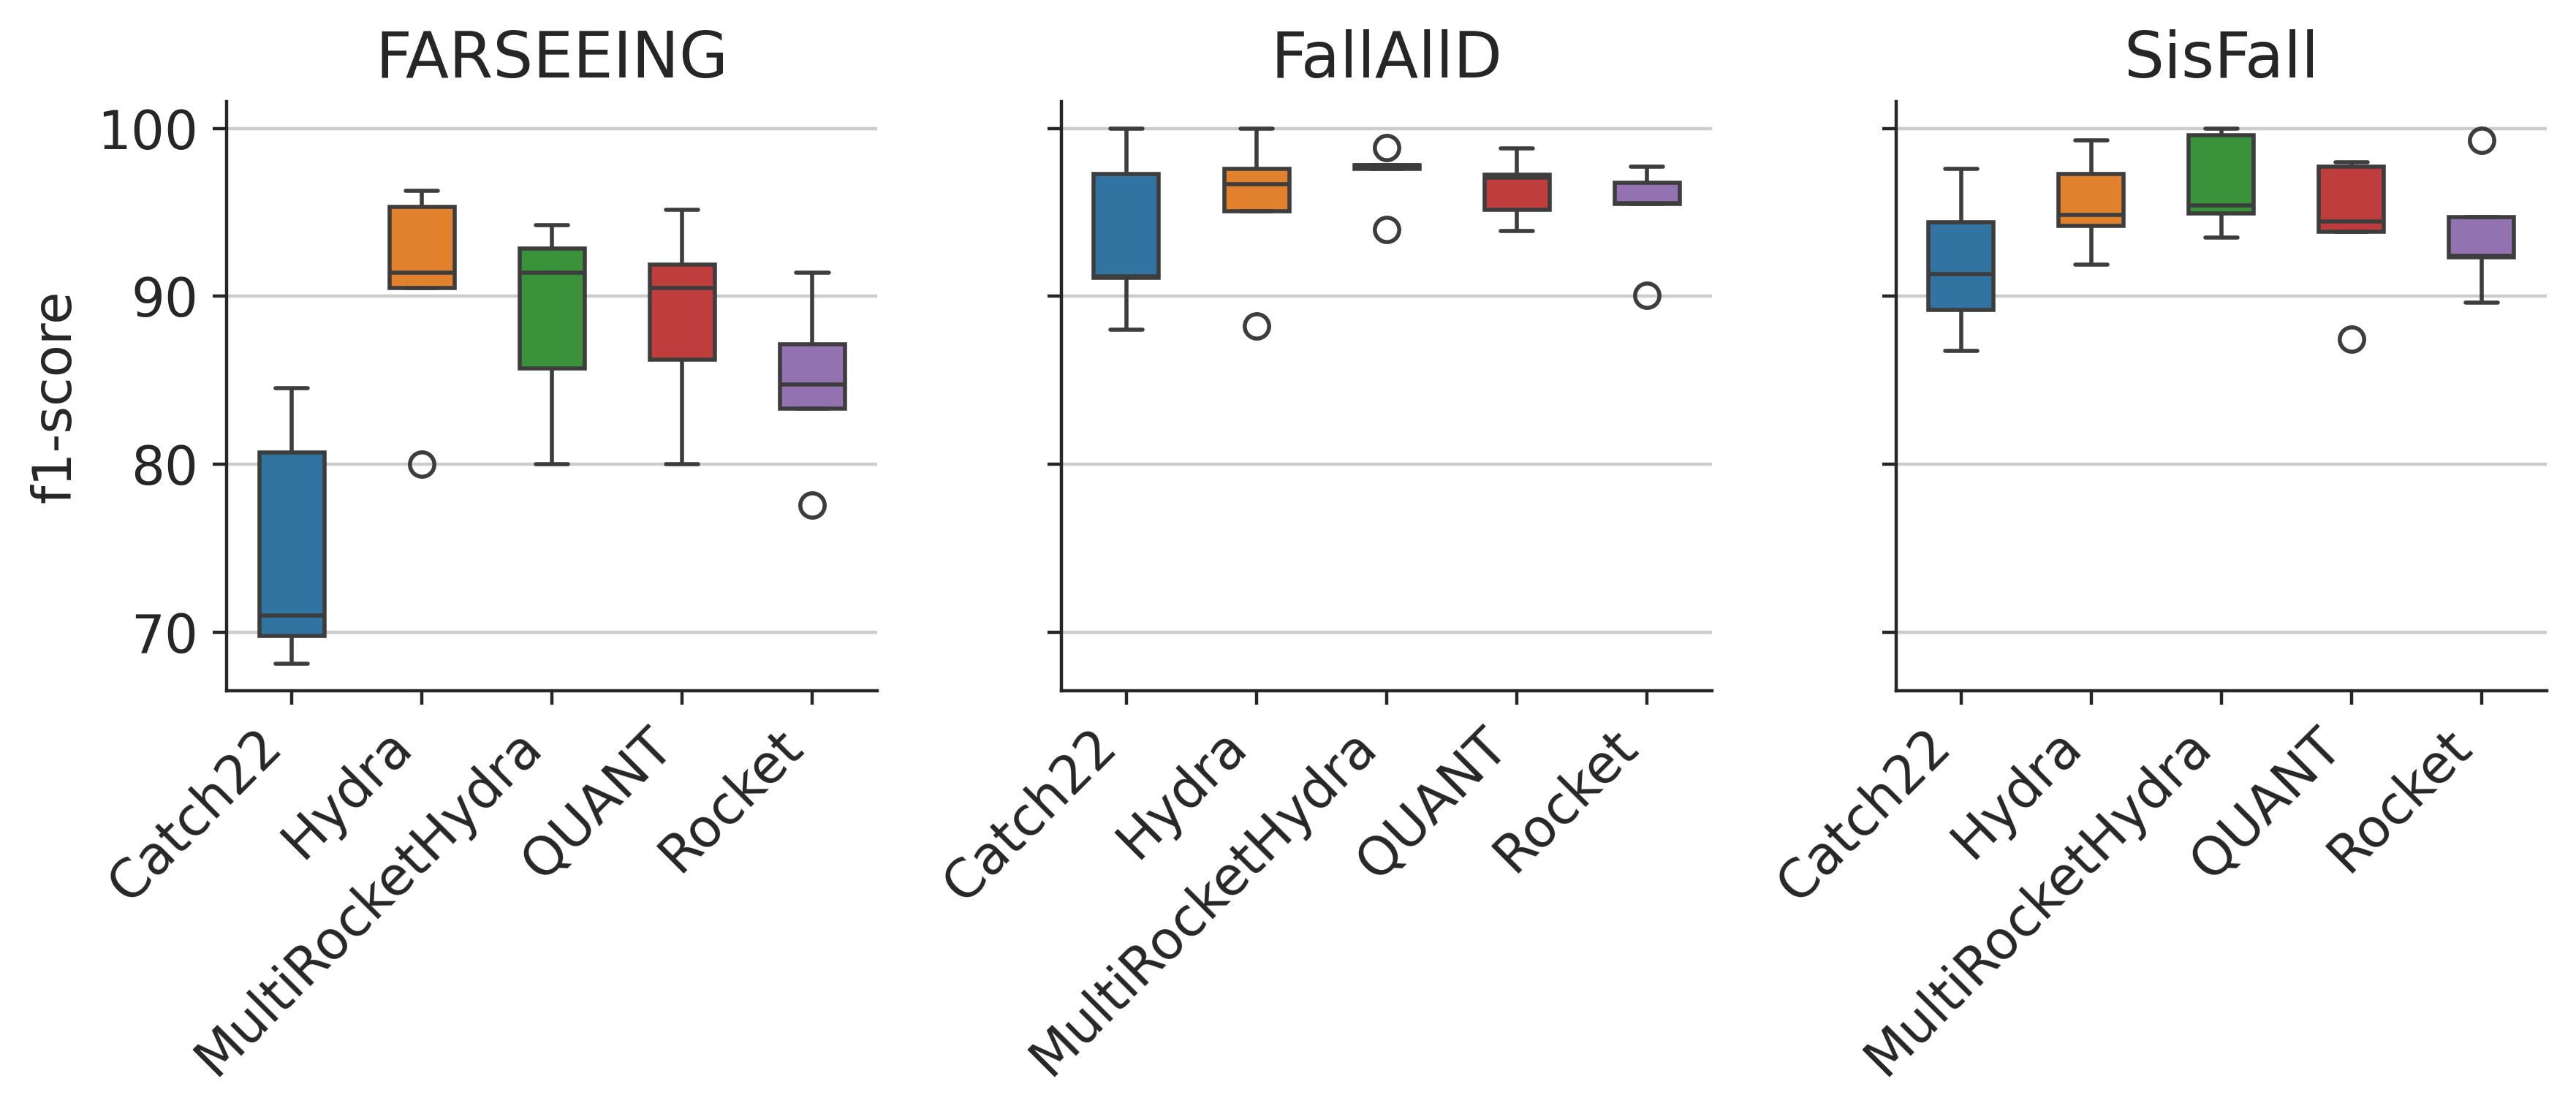

In [70]:
dfs_ts = [farseeing_cv_df_ts, fallalld_cv_df_ts, sisfall_cv_df_ts]
utils.summary_visualization(dfs_ts, model_type='ts')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


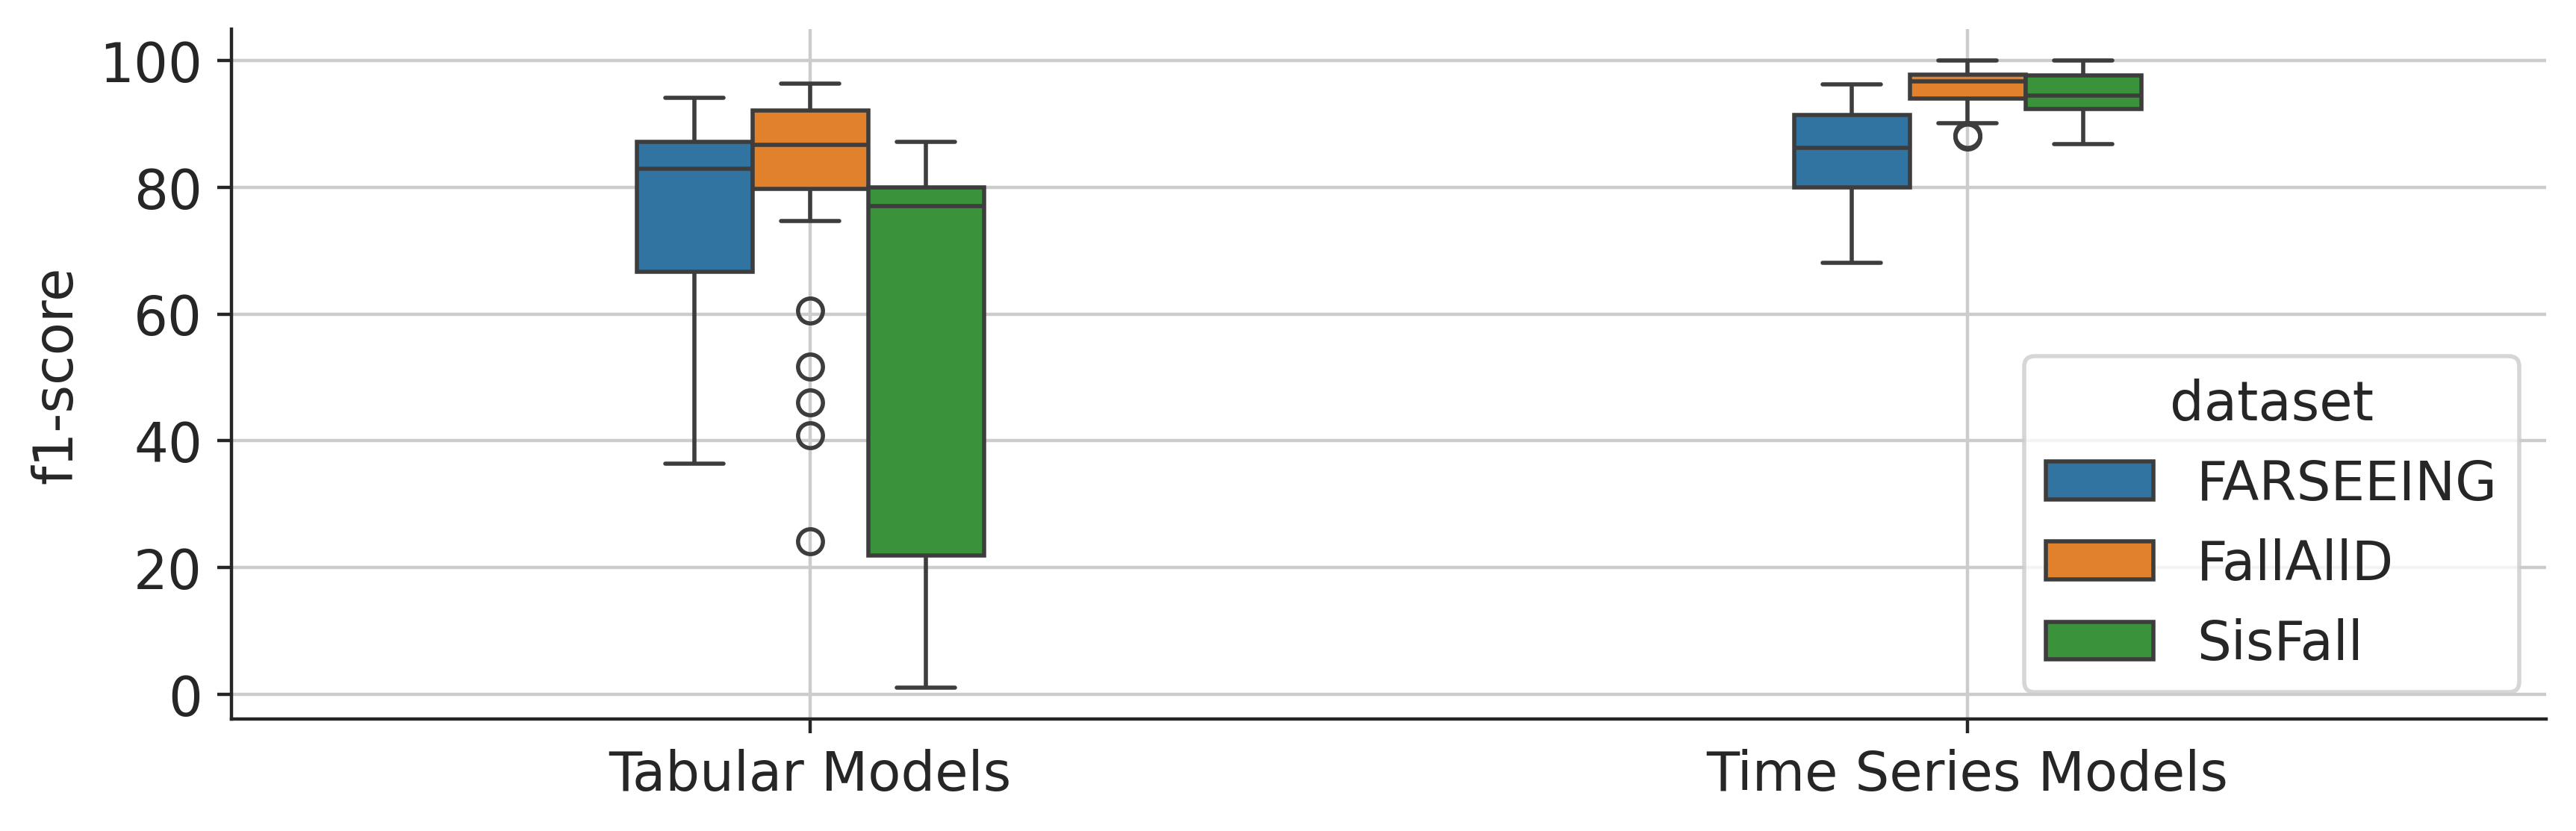

In [113]:
all_dfs = [farseeing_cv_df, farseeing_cv_df_ts, fallalld_cv_df, fallalld_cv_df_ts, sisfall_cv_df, sisfall_cv_df_ts]
utils.ts_vs_tabular_summary(all_dfs)

## Cross-Dataset Evaluation
Train on simulated data and test on FARSEEING.
- Resample the datasets and clip all to  be within (-2g/2g)
- Do a single subject-based train/test split of FARSEEING
- Let the test set be R. Do the following experiments:
  - Train on farseeing and Test on R
  - Train on FallAllD and test on R
  - Train on Sisfall and test on R
  - Combine farseeing+sisfall and test on R
  - Combine farseeing+fallalld and test on R
- Compare the results

### Single Train/Test Split on FARSEEING

In [79]:
X_train_farseeing, X_test, y_train_farseeing, y_test = utils.train_test_subjects_split(farseeing)

13 of 41 subjects: ['75240038' '92680167' '40865626' '79761947' '00002186' '25101363'
 '10250790' '79336438' '93169462' '72156894' '95253031' '97085274'
 '08332163'].
Train set: X: (1173, 700), y: (1173,)        ([ADLs, Falls]) [1062  111]
Test set: X: (141, 700), y: (141,)        ([ADLs, Falls]) [107  34]


Train and test on FARSEEING

In [80]:
train_on_farseeing_df, _ = classifiers.run_models(
  X_train_farseeing, y_train_farseeing, X_test, y_test,
  type='ts', freq=100)

Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

In [83]:
train_on_farseeing_df['trainset']='FARSEEING'
train_on_farseeing_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,trainset
0,Hydra,7,25473.0,96.0,91.43,94.12,97.20,92.75,FARSEEING
1,Rocket,7,7986.0,93.0,86.11,91.18,95.33,88.57,FARSEEING
2,MultiRocketHydra,7,36599.0,96.0,94.12,94.12,98.13,94.12,FARSEEING
3,Catch22,7,17316.0,97.0,88.89,70.59,97.20,78.69,FARSEEING
4,QUANT,7,18225.0,100.0,91.67,97.06,97.20,94.29,FARSEEING


### FallAllD > FARSEEING

- Train on FallAllD and test on FARSEEING
- Combine farseeing+fallalld and test on FARSEEING

In [85]:
fallalld_farseeing = classifiers.cross_dataset_eval(fallalld, farseeing)

Train set: X: (1080, 700), y: (1080,)        ([ADLs, Falls]) [789 291]
Test set: X: (665, 700), y: (665,)        ([ADLs, Falls]) [490 175]
Test set -> 13 of 41 subjects: ['75240038' '92680167' '40865626' '79761947' '00002186' '25101363'
 '10250790' '79336438' '93169462' '72156894' '95253031' '97085274'
 '08332163'].
Train set: X: (1173, 700), y: (1173,)        ([ADLs, Falls]) [1062  111]
Test set: X: (141, 700), y: (141,)        ([ADLs, Falls]) [107  34]
<----- FallAllD > FARSEEING ----->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... <----- FallAllD + FARSEEING ----->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

In [86]:
fallalld_farseeing

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,trainset
0,Hydra,7,30203.0,76.0,90.00,52.94,98.13,66.67,FallAllD
1,Rocket,7,7658.0,74.0,64.52,58.82,89.72,61.54,FallAllD
2,MultiRocketHydra,7,30558.0,82.0,85.19,67.65,96.26,75.41,FallAllD
3,Catch22,7,14305.0,86.0,73.53,73.53,91.59,73.53,FallAllD
4,QUANT,7,15464.0,91.0,85.19,67.65,96.26,75.41,FallAllD
5,Hydra,7,47561.0,91.0,96.55,82.35,99.07,88.89,FallAllD+FARSEEING
6,Rocket,7,12967.0,86.0,83.87,76.47,95.33,80.00,FallAllD+FARSEEING
7,MultiRocketHydra,7,61002.0,90.0,93.33,82.35,98.13,87.50,FallAllD+FARSEEING
8,Catch22,7,22372.0,98.0,93.33,82.35,98.13,87.50,FallAllD+FARSEEING
9,QUANT,7,17727.0,98.0,96.30,76.47,99.07,85.25,FallAllD+FARSEEING


### SisFall > FARSEEING

- Train on SisFall and test on FARSEEING
- Combine farseeing+sisfall and test on FARSEEING

In [87]:
sisfall_farseeing = classifiers.cross_dataset_eval(sisfall, farseeing)

Train set: X: (8242, 700), y: (8242,)        ([ADLs, Falls]) [7361  881]
Test set: X: (3798, 700), y: (3798,)        ([ADLs, Falls]) [3479  319]
Test set -> 13 of 41 subjects: ['75240038' '92680167' '40865626' '79761947' '00002186' '25101363'
 '10250790' '79336438' '93169462' '72156894' '95253031' '97085274'
 '08332163'].
Train set: X: (1173, 700), y: (1173,)        ([ADLs, Falls]) [1062  111]
Test set: X: (141, 700), y: (141,)        ([ADLs, Falls]) [107  34]

<----- SisFall > FARSEEING ----->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<----- SisFall + FARSEEING ----->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

In [88]:
sisfall_farseeing

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,trainset
0,Hydra,7,140083.0,69.0,38.03,79.41,58.88,51.43,SisFall
1,Rocket,7,43003.0,76.0,39.53,100.00,51.40,56.67,SisFall
2,MultiRocketHydra,7,177831.0,69.0,37.33,82.35,56.07,51.38,SisFall
3,Catch22,7,65126.0,88.0,31.43,97.06,32.71,47.48,SisFall
4,QUANT,7,29595.0,84.0,46.15,88.24,67.29,60.61,SisFall
5,Hydra,7,163831.0,93.0,80.00,94.12,92.52,86.49,SisFall+FARSEEING
6,Rocket,7,49755.0,94.0,78.57,97.06,91.59,86.84,SisFall+FARSEEING
7,MultiRocketHydra,7,200182.0,94.0,88.57,91.18,96.26,89.86,SisFall+FARSEEING
8,Catch22,7,70985.0,95.0,77.14,79.41,92.52,78.26,SisFall+FARSEEING
9,QUANT,7,32632.0,98.0,83.33,88.24,94.39,85.71,SisFall+FARSEEING


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


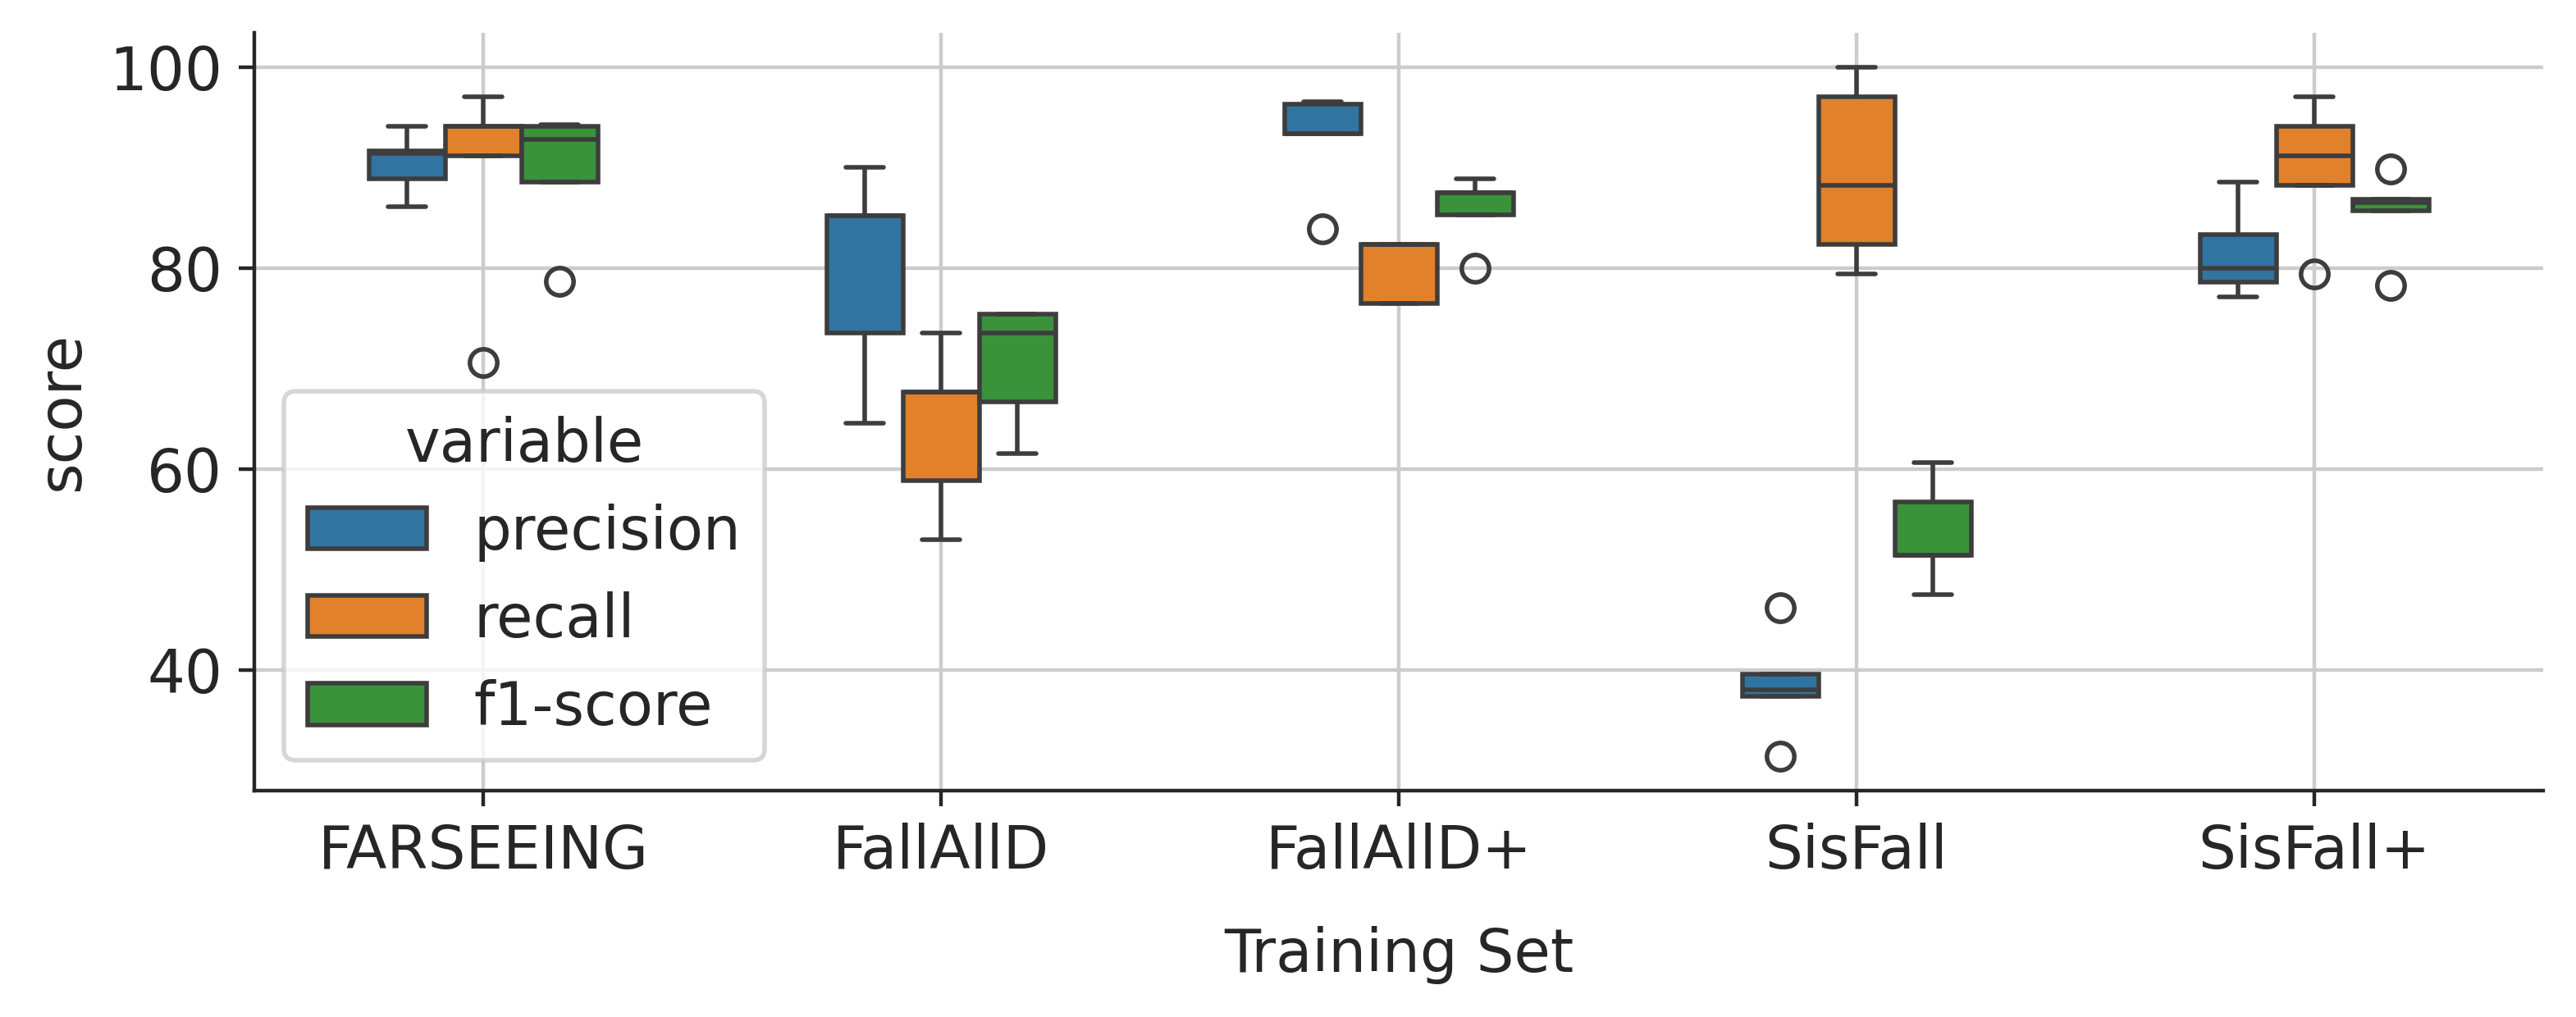

In [111]:
utils.cross_dataset_summary(
  [train_on_farseeing_df, fallalld_farseeing,sisfall_farseeing])

## Temporal Attribution Scores

Load data and train model first

In [114]:
X_tr, X_te, y_tr, y_te = utils.train_test_subjects_split(farseeing, show_test=True)

Test set -> 13 of 41 subjects: ['75240038' '92680167' '40865626' '79761947' '00002186' '25101363'
 '10250790' '79336438' '93169462' '72156894' '95253031' '97085274'
 '08332163'].
Train set: X: (1173, 700), y: (1173,)        ([ADLs, Falls]) [1062  111]
Test set: X: (141, 700), y: (141,)        ([ADLs, Falls]) [107  34]


Hydra... Hydra AUC: 0.96
              precision    recall  f1-score   support

         ADL       0.98      0.97      0.98       107
        Fall       0.91      0.94      0.93        34

    accuracy                           0.96       141
   macro avg       0.95      0.96      0.95       141
weighted avg       0.97      0.96      0.96       141

Rocket... Rocket AUC: 0.9
              precision    recall  f1-score   support

         ADL       0.96      0.93      0.94       107
        Fall       0.79      0.88      0.83        34

    accuracy                           0.91       141
   macro avg       0.88      0.90      0.89       141
weighted avg       0.92      0.91      0.92       141

MultiRocketHydra... MultiRocketHydra AUC: 0.95
              precision    recall  f1-score   support

         ADL       0.97      0.99      0.98       107
        Fall       0.97      0.91      0.94        34

    accuracy                           0.97       141
   macro avg       0.97      0

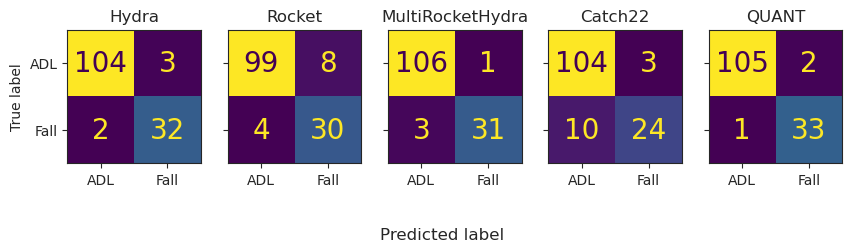

In [150]:
dfs, models = classifiers.run_models(
    X_tr, y_tr, X_te, y_te,freq=100,type='ts',verbose=3)

In [151]:
dfs

,model,window_size,runtime,auc,precision,recall,specificity,f1-score
0,Hydra,7,29290.0,96.0,91.43,94.12,97.20,92.75
1,Rocket,7,8225.0,90.0,78.95,88.24,92.52,83.33
2,MultiRocketHydra,7,32636.0,95.0,96.88,91.18,99.07,93.94
3,Catch22,7,11122.0,95.0,88.89,70.59,97.20,78.69
4,QUANT,7,15127.0,100.0,94.29,97.06,98.13,95.65


Get temporal attributions

In [ ]:
samples_and_attributions_dict = {}
for model_name, clf in models.items():
    print(model_name)
    samples_and_attributions_dict[model_name] = classifiers.get_sample_attributions(
        clf, X_test, y_test, normalise='Hydra' not in model_name)

In [155]:
with open('results/samples_and_attributions_dict.pkl', 'wb') as file:
    pickle.dump(samples_and_attributions_dict, file)
# with open('results/samples_and_attributions_dict.pkl', 'rb') as file:
#     samples_and_attributions_dict=pickle.load(file)

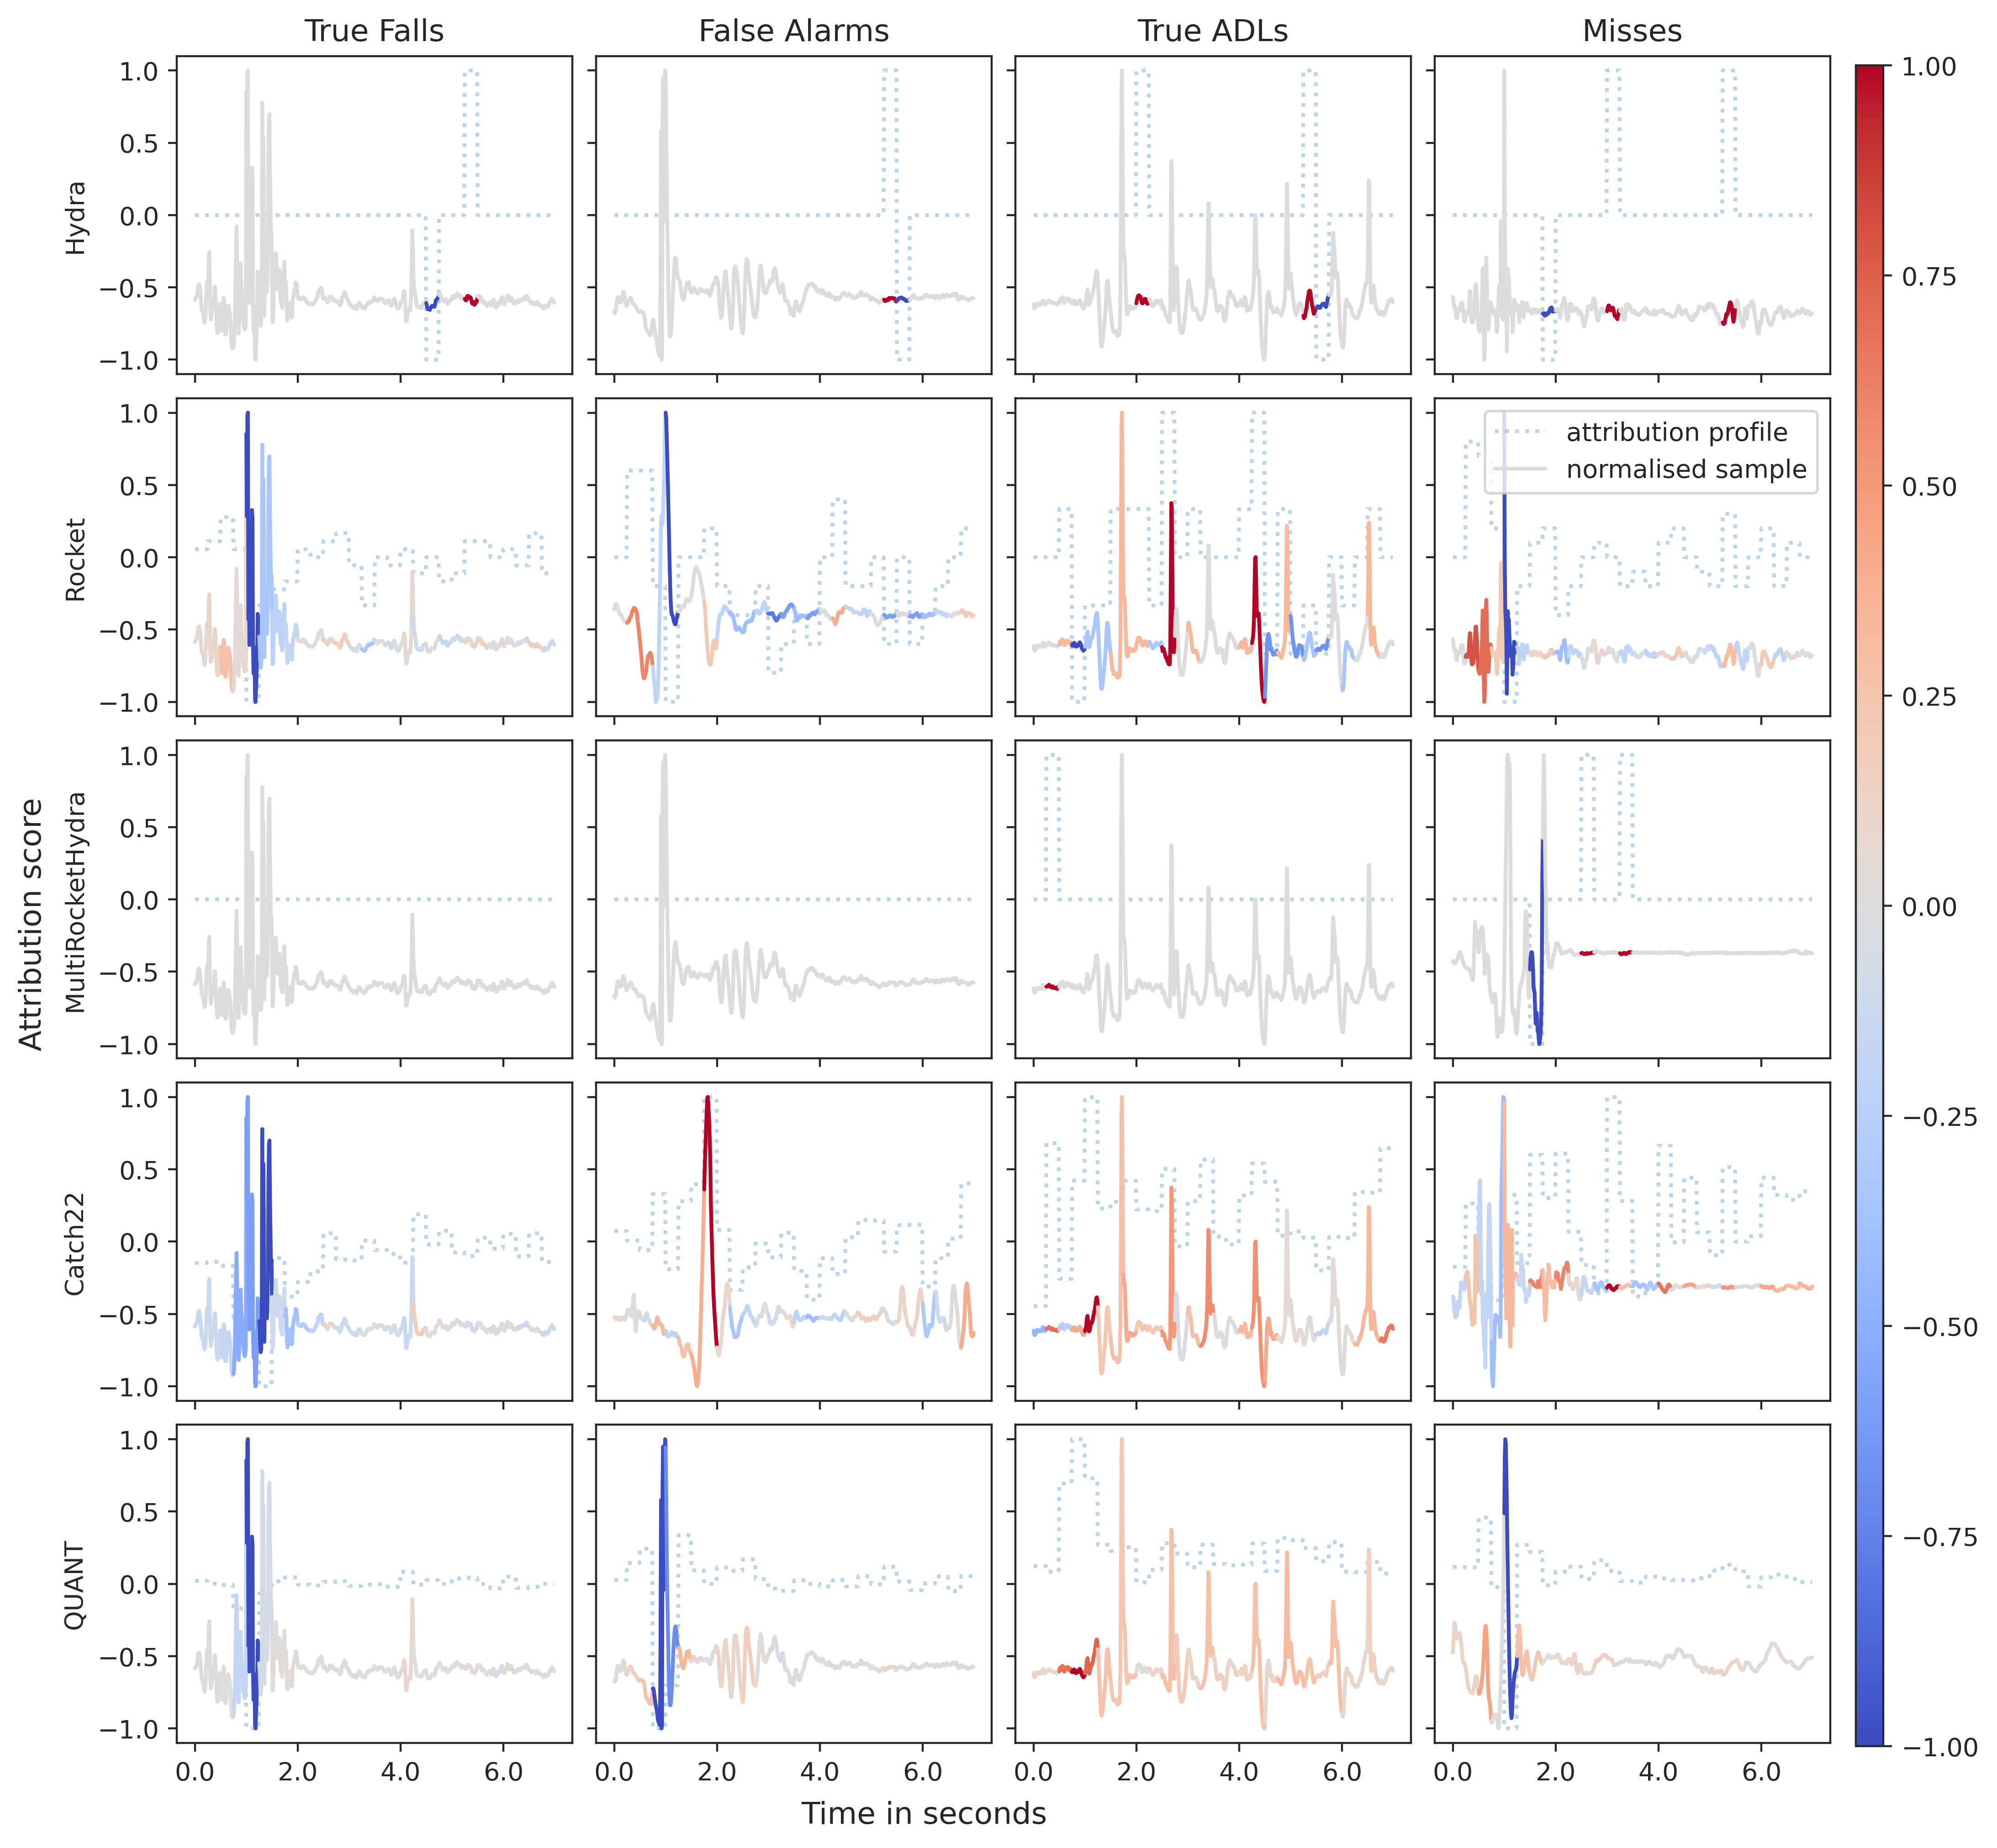

In [154]:
classifiers.plot_sample_with_attributions(samples_and_attributions_dict)

## Ablation Studies

### Effect of Window Size

In [164]:
# Sample FARSEEING with post fall window size of 24.5 seconds
X_train_2750, X_test_2750, y_train_2750, y_test_2750 = utils.train_test_subjects_split(farseeing)

Train set: X: (1094, 2750), y: (1094,)        ([ADLs, Falls]) [983 111]
Test set: X: (115, 2750), y: (115,)        ([ADLs, Falls]) [81 34]


In [165]:
ts_window_metrics = None
for s in range(3, 28):
    print(f'\n\n<--- Window size: {s} seconds --->')
    if ts_window_metrics is None:
        ts_window_metrics, _ = classifiers.run_models(
            X_train_2750, y_train_2750, X_test_2750, y_test_2750,
            s=s, type='ts', freq=100)
    else:
        new_metrics_df, _ = classifiers.run_models(
            X_train_2750, y_train_2750, X_test_2750, y_test_2750,
            s=s, type='ts', freq=100)
        ts_window_metrics = pd.concat([ts_window_metrics, new_metrics_df],
                                      ignore_index=True)



<--- Window size: 3 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 4 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 5 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 6 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 7 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 8 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 9 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 10 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 11 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 12 seconds --->
Hydra... Rocket... MultiRocketHydra... Catch22... QUANT... 

<--- Window size: 13 seconds --->
Hydra... Rocket... Mu

In [167]:
ts_window_metrics.to_csv('results/window_size_ablation.csv')

In [173]:
ts_window_metrics

,model,window_size,runtime,auc,precision,recall,specificity,f1-score
0,Hydra,3,65674.0,92.0,90.91,88.24,96.30,89.55
1,Rocket,3,6423.0,86.0,72.50,85.29,86.42,78.38
2,MultiRocketHydra,3,72451.0,94.0,93.94,91.18,97.53,92.54
3,Catch22,3,9959.0,95.0,93.10,79.41,97.53,85.71
4,QUANT,3,218203.0,100.0,96.97,94.12,98.77,95.52
...,...,...,...,...,...,...,...,...
120,Hydra,27,344653.0,91.0,73.33,97.06,85.19,83.54
121,Rocket,27,44174.0,93.0,88.57,91.18,95.06,89.86
122,MultiRocketHydra,27,358964.0,95.0,91.43,94.12,96.30,92.75
123,Catch22,27,34972.0,97.0,88.89,94.12,95.06,91.43


In [177]:
ave_from_winsizes =ts_window_metrics.drop(columns=['model']).groupby(['window_size']).mean()

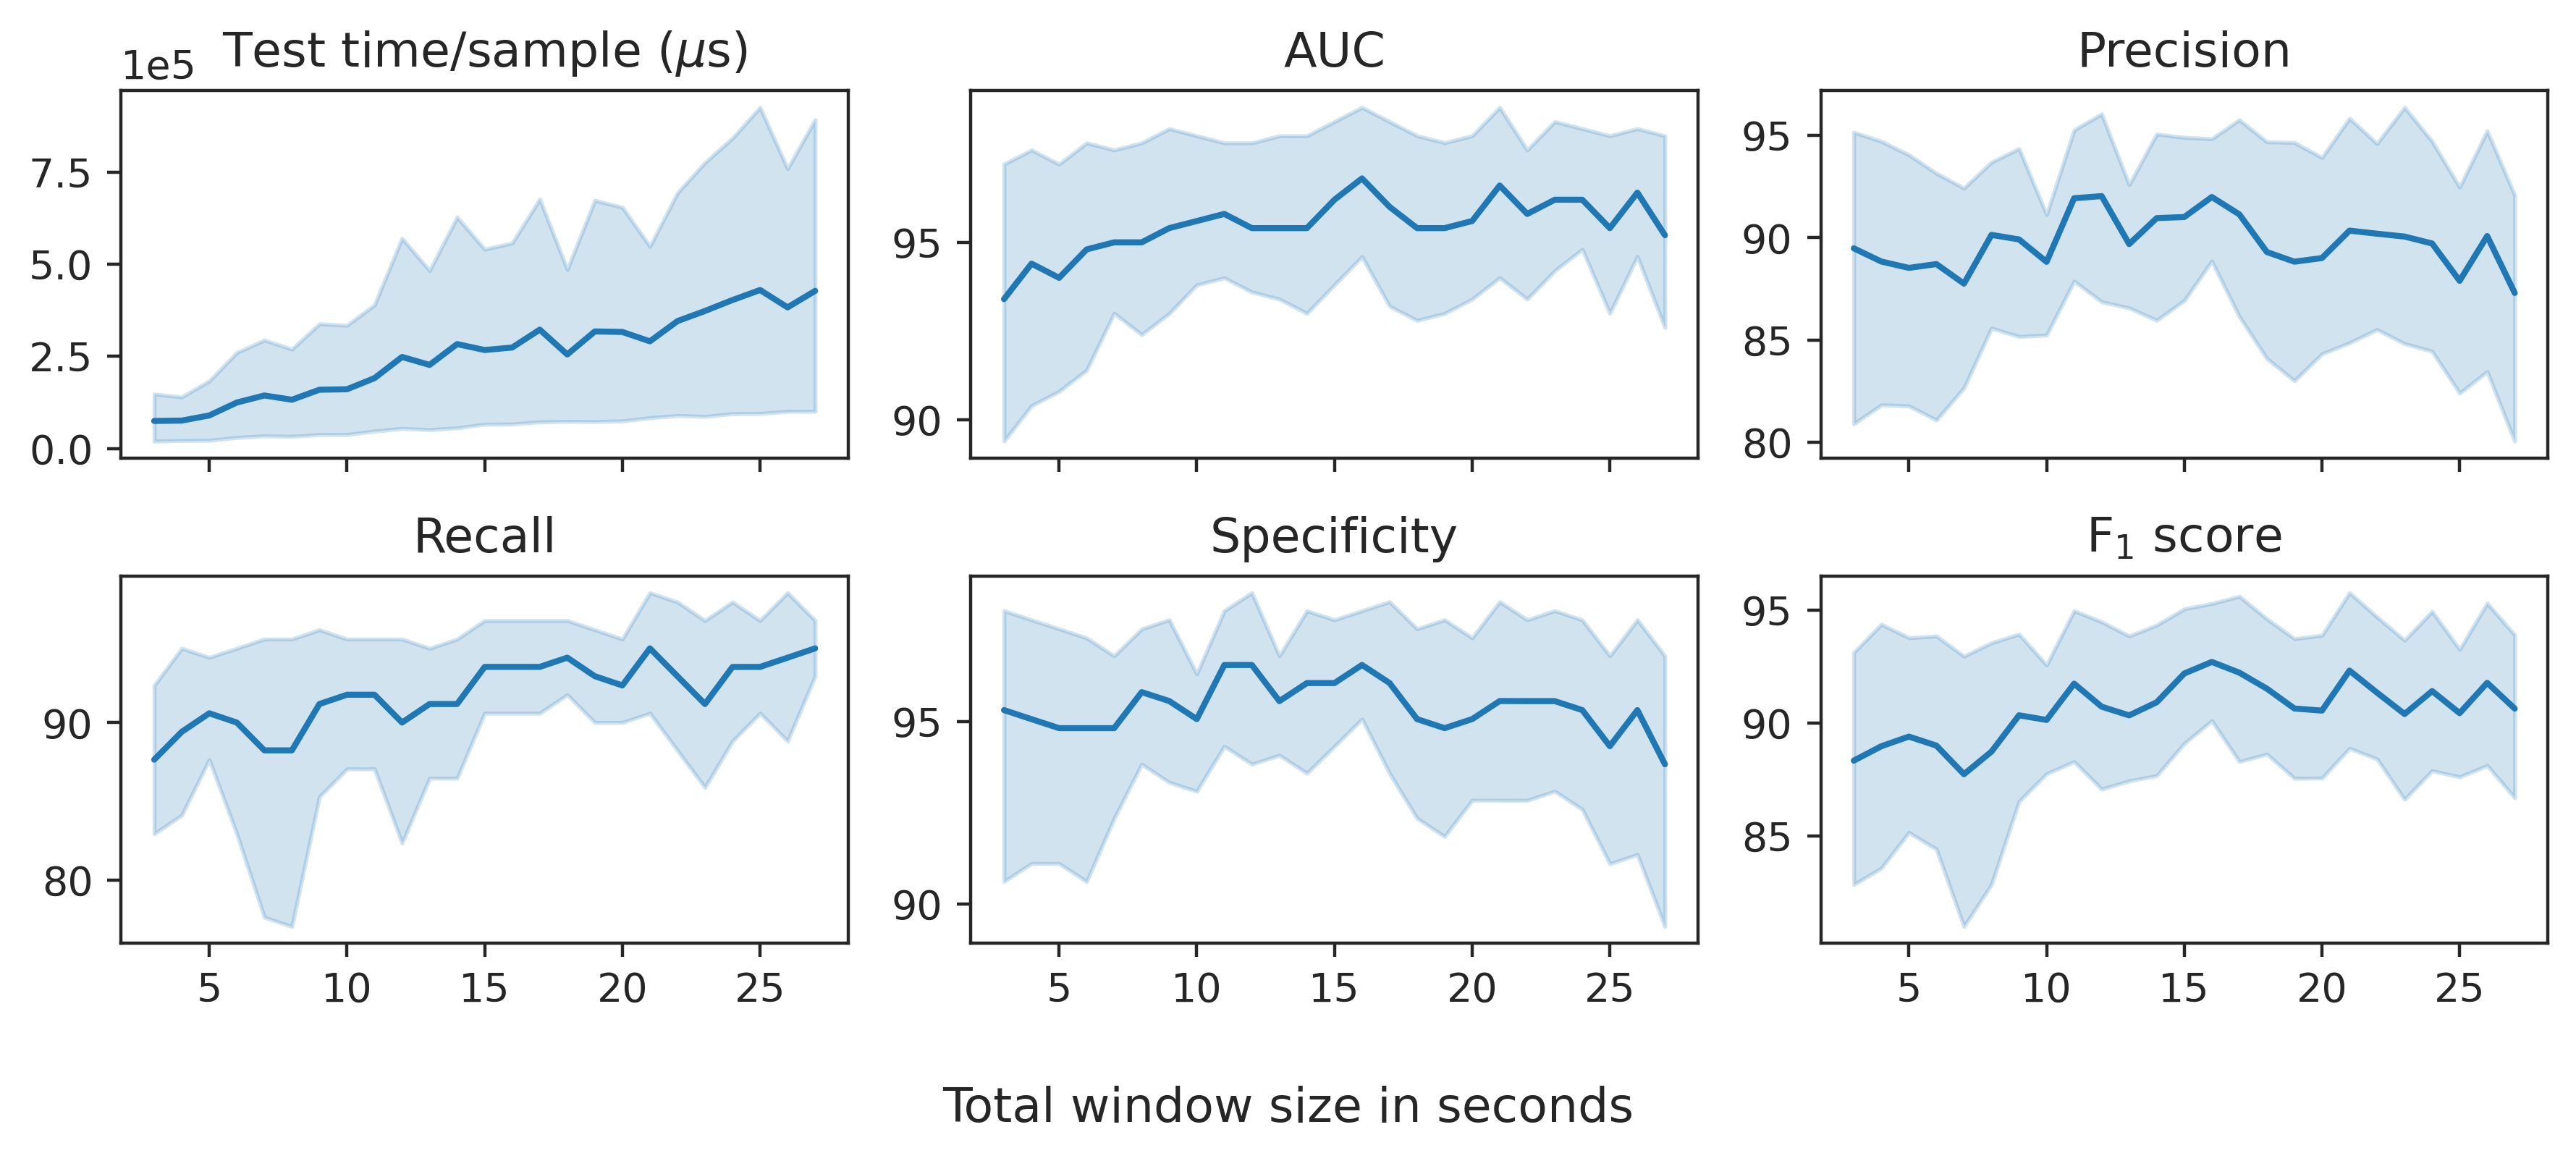

In [217]:
utils.plot_window_size_ablation(ts_window_metrics)